## Esercizio 11.2 - Fit polinomiale
In questo esercizio vogliamo ottenere un fit ragionevole del polinomio di terzo grado:
$$
f(x)=4-3x-2x^2+3x^3 = a+bx+cx^2+dx^3 
$$
per $x \in [-1,1]$.
Utilizziamo diversi modelli di NN, inizialmente con diverso numero di hidden layers e di neuroni, fissando come funzione di attivazione la 'selu', come ottimizzatore 'sgd' e come loss function 'mse'. Dopo aver determinato il numero di layers e di neuroni ottimale, eseguiremo un'analisi più fine studiando diverse funzioni di attivazione, ottimizzatori e funzioni di loss.

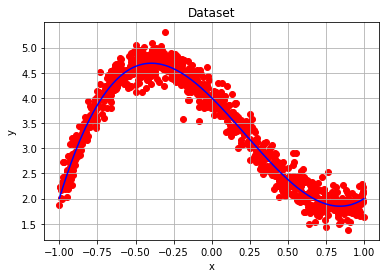

In [2]:
import numpy as np

a = 4
b = -3
c = -2
d = 3

# generate training inputs
np.random.seed(0)
n_train = 10000
n_valid = int(n_train/10)
x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target = a + b*x_valid + c*(x_valid**2) + d*(x_valid**3)  # ideal (target) function

sigma = 0.2 # noise standard deviation
y_train = np.random.normal(a + b*x_train + c*(x_train**2) + d*(x_train**3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c*(x_valid**2) + d*(x_valid**3), sigma)

import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, color = 'b')
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); 
plt.title("Dataset")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

### 1) Numero di hidden layers $N_{hl}$  e numero di neuroni $N_{neuroni}$ per layer
In questa sezione confronteremo in totale 12 diversi modelli: $N_{hl} = 1,2,3$ e per ognuno di essi $N_{neuroni}$ = 2,5,10,15, tenendo fissati la funzione di attivazione = 'selu', ottimizzatore = 'sgd' e loss = 'mse'.
### $N_{hl}=1$

In [81]:
model_1_2 = tf.keras.Sequential()
model_1_2.add(Dense(2, input_shape=(1,), activation='selu'))
model_1_2.add(Dense(2, activation='selu'))
model_1_2.add(Dense(1, activation='selu'))

model_1_2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model_1_2.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_107 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [82]:
model_1_5 = tf.keras.Sequential()
model_1_5.add(Dense(5, input_shape=(1,), activation='selu'))
model_1_5.add(Dense(5, activation='selu'))
model_1_5.add(Dense(1, activation='selu'))

model_1_5.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model_1_5.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 5)                 10        
_________________________________________________________________
dense_110 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_1_10 = tf.keras.Sequential()
model_1_10.add(Dense(10, input_shape=(1,), activation='selu'))
model_1_10.add(Dense(10, activation='selu'))
model_1_10.add(Dense(1, activation='selu'))

model_1_10.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model_1_10.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_113 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [84]:
model_1_15 = tf.keras.Sequential()
model_1_15.add(Dense(15, input_shape=(1,), activation='selu'))
model_1_15.add(Dense(15, activation='selu'))
model_1_15.add(Dense(1, activation='selu'))

model_1_15.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model_1_15.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 15)                30        
_________________________________________________________________
dense_116 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 16        
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


In [85]:
n_epochs=50
history_1_2 = model_1_2.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))
history_1_5 = model_1_5.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history_1_10 = model_1_10.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history_1_15 = model_1_15.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.7458 - mse: 0.7458 - val_loss: 0.2665 - val_mse: 0.2665
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.2092 - mse: 0.2092 - val_loss: 0.1621 - val_mse: 0.1621
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1363 - mse: 0.1363 - val_loss: 0.1123 - val_mse: 0.1123
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1041 - mse: 0.1041 - val_loss: 0.0942 - val_mse: 0.0942
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0932 - mse: 0.0932 - val_loss: 0.0873 - val_mse: 0.0873
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0874 - mse: 0.0874 - val_loss: 0.0834 - val_mse: 0.0834
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0834 - mse: 0.0834 - val_loss: 0.0801 - val_mse: 0.0801
Epoch 8/50
200/200 [==============================] - 0s 2ms/step - loss: 0.

Epoch 13/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 14/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0452 - val_mse: 0.0452
Epoch 15/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0462 - mse: 0.0462 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 16/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 17/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 18/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0444 - val_mse: 0.0444
Epoch 19/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 20/50
200/200 [==============================] - 0s 1ms/step - 

200/200 [==============================] - 0s 2ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 36/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 37/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 38/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 39/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 40/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 41/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 42/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0431

In [86]:
# evaluate model
score_1_2 = model_1_2.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_1_2[0])
print('Test accuracy:', score_1_2[1])

score_1_5 = model_1_5.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_1_5[0])
print('Test accuracy:', score_1_5[1])

score_1_10 = model_1_10.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_1_10[0])
print('Test accuracy:', score_1_10[1])

score_1_15 = model_1_15.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_1_15[0])
print('Test accuracy:', score_1_15[1])

20/20 [==============================] - 0s 2ms/step - loss: 0.0623 - mse: 0.0623

Test loss: 0.06227366626262665
Test accuracy: 0.06227366626262665
20/20 [==============================] - 0s 3ms/step - loss: 0.0409 - mse: 0.0409

Test loss: 0.040893297642469406
Test accuracy: 0.040893297642469406
20/20 [==============================] - 0s 3ms/step - loss: 0.0419 - mse: 0.0419

Test loss: 0.041883185505867004
Test accuracy: 0.041883185505867004
20/20 [==============================] - 0s 3ms/step - loss: 0.0421 - mse: 0.0421

Test loss: 0.042087871581315994
Test accuracy: 0.042087871581315994


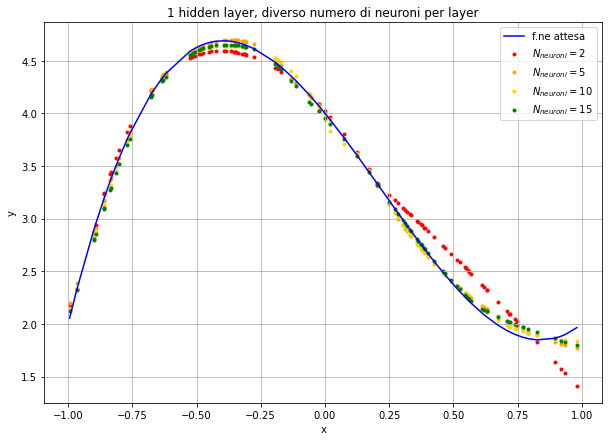

In [87]:
fig = plt.figure(figsize=(10,7))
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted.sort()
plt.scatter(x_predicted, model_1_2.predict(x_predicted),color='r', label = '$N_{neuroni}=2$', marker = '.')
plt.scatter(x_predicted, model_1_5.predict(x_predicted),color='orange', label = '$N_{neuroni}=5$', marker = '.')
plt.scatter(x_predicted, model_1_10.predict(x_predicted),color='gold', label = '$N_{neuroni}=10$', marker = '.')
plt.scatter(x_predicted, model_1_15.predict(x_predicted),color='green', label = '$N_{neuroni}=15$', marker = '.')
plt.plot(x_predicted, a+b*x_predicted+c*(x_predicted**2)+d*(x_predicted**3), color = 'blue', label='f.ne attesa')
plt.grid(True)
plt.legend()
plt.title("1 hidden layer, diverso numero di neuroni per layer")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### $N_{hl}=2$

In [88]:
model_2_2 = tf.keras.Sequential()
model_2_2.add(Dense(2, input_shape=(1,), activation='selu'))
model_2_2.add(Dense(2, activation='selu'))
model_2_2.add(Dense(2, activation='selu'))
model_2_2.add(Dense(1, activation='selu'))

model_2_2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model_2_2.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_119 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_120 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 3         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [89]:
model_2_5 = tf.keras.Sequential()
model_2_5.add(Dense(5, input_shape=(1,), activation='selu'))
model_2_5.add(Dense(5, activation='selu'))
model_2_5.add(Dense(5, activation='selu'))
model_2_5.add(Dense(1, activation='selu'))

model_2_5.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model_2_5.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 5)                 10        
_________________________________________________________________
dense_123 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_124 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [90]:
model_2_10 = tf.keras.Sequential()
model_2_10.add(Dense(10, input_shape=(1,), activation='selu'))
model_2_10.add(Dense(10, activation='selu'))
model_2_10.add(Dense(10, activation='selu'))
model_2_10.add(Dense(1, activation='selu'))

model_2_10.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model_2_10.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_127 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_128 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_2_15 = tf.keras.Sequential()
model_2_15.add(Dense(15, input_shape=(1,), activation='selu'))
model_2_15.add(Dense(15, activation='selu'))
model_2_15.add(Dense(15, activation='selu'))
model_2_15.add(Dense(1, activation='selu'))

model_2_15.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model_2_15.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_130 (Dense)            (None, 15)                30        
_________________________________________________________________
dense_131 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_132 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_133 (Dense)            (None, 1)                 16        
Total params: 526
Trainable params: 526
Non-trainable params: 0
_________________________________________________________________


In [92]:
n_epochs=50
history_2_2 = model_2_2.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))
history_2_5 = model_2_5.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history_2_10 = model_2_10.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history_2_15 = model_2_15.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
200/200 [==============================] - 1s 4ms/step - loss: 0.6133 - mse: 0.6133 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0805 - mse: 0.0805 - val_loss: 0.0533 - val_mse: 0.0533
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0498 - mse: 0.0498 - val_loss: 0.0461 - val_mse: 0.0461
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0430 - val_mse: 0.0430
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0423 - val_mse: 0.0423
Epoch 8/50
200/200 [==============================] - 1s 4ms/step - loss: 0.

Epoch 13/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0431 - val_mse: 0.0431
Epoch 14/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 15/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 16/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 17/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 18/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 19/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 20/50
200/200 [==============================] - 0s 1ms/step - 

200/200 [==============================] - 0s 2ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 36/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 37/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 38/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 39/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 40/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 41/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 42/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0436

In [93]:
# evaluate model
score_2_2 = model_2_2.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_2[0])
print('Test accuracy:', score_2_2[1])

score_2_5 = model_2_5.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_5[0])
print('Test accuracy:', score_2_5[1])

score_2_10 = model_2_10.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_10[0])
print('Test accuracy:', score_2_10[1])

score_2_15 = model_2_15.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_15[0])
print('Test accuracy:', score_2_15[1])

20/20 [==============================] - 0s 2ms/step - loss: 0.0404 - mse: 0.0404

Test loss: 0.04043779522180557
Test accuracy: 0.04043779522180557
20/20 [==============================] - 0s 2ms/step - loss: 0.0407 - mse: 0.0407

Test loss: 0.0407322496175766
Test accuracy: 0.0407322496175766
20/20 [==============================] - 0s 3ms/step - loss: 0.0413 - mse: 0.0413

Test loss: 0.041251812130212784
Test accuracy: 0.041251812130212784
20/20 [==============================] - 0s 2ms/step - loss: 0.0404 - mse: 0.0404

Test loss: 0.04036485031247139
Test accuracy: 0.04036485031247139


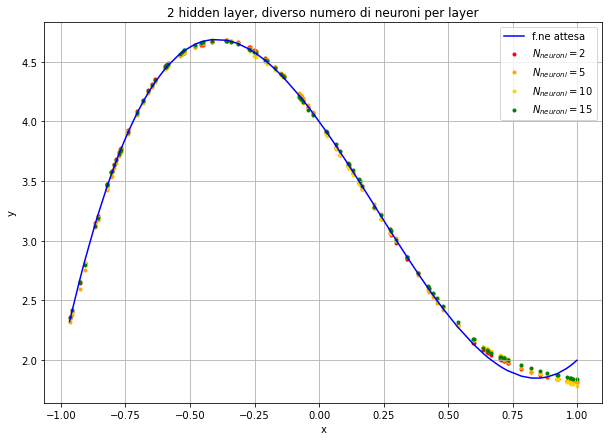

In [94]:
fig = plt.figure(figsize=(10,7))
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted.sort()
plt.scatter(x_predicted, model_2_2.predict(x_predicted),color='r', label = '$N_{neuroni}=2$', marker = '.')
plt.scatter(x_predicted, model_2_5.predict(x_predicted),color='orange', label = '$N_{neuroni}=5$', marker = '.')
plt.scatter(x_predicted, model_2_10.predict(x_predicted),color='gold', label = '$N_{neuroni}=10$', marker = '.')
plt.scatter(x_predicted, model_2_15.predict(x_predicted),color='green', label = '$N_{neuroni}=15$', marker = '.')
plt.plot(x_predicted, a+b*x_predicted+c*(x_predicted**2)+d*(x_predicted**3), color = 'blue', label='f.ne attesa')
plt.grid(True)
plt.legend()
plt.title("2 hidden layer, diverso numero di neuroni per layer")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### $N_{hl}=3$

In [95]:
model_3_2 = tf.keras.Sequential()
model_3_2.add(Dense(2, input_shape=(1,), activation='selu'))
model_3_2.add(Dense(2, activation='selu'))
model_3_2.add(Dense(2, activation='selu'))
model_3_2.add(Dense(2, activation='selu'))
model_3_2.add(Dense(1, activation='selu'))

model_3_2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model_3_2.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_135 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_136 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_137 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_138 (Dense)            (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [96]:
model_3_5 = tf.keras.Sequential()
model_3_5.add(Dense(5, input_shape=(1,), activation='selu'))
model_3_5.add(Dense(5, activation='selu'))
model_3_5.add(Dense(5, activation='selu'))
model_3_5.add(Dense(5, activation='selu'))
model_3_5.add(Dense(1, activation='selu'))

model_3_5.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model_3_5.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 5)                 10        
_________________________________________________________________
dense_140 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_141 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_142 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 6         
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [97]:
model_3_10 = tf.keras.Sequential()
model_3_10.add(Dense(10, input_shape=(1,), activation='selu'))
model_3_10.add(Dense(10, activation='selu'))
model_3_10.add(Dense(10, activation='selu'))
model_3_10.add(Dense(10, activation='selu'))
model_3_10.add(Dense(1, activation='selu'))

model_3_10.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model_3_10.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_145 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_146 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_147 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_148 (Dense)            (None, 1)                 11        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [98]:
model_3_15 = tf.keras.Sequential()
model_3_15.add(Dense(15, input_shape=(1,), activation='selu'))
model_3_15.add(Dense(15, activation='selu'))
model_3_15.add(Dense(15, activation='selu'))
model_3_15.add(Dense(15, activation='selu'))
model_3_15.add(Dense(1, activation='selu'))

model_3_15.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model_3_15.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 15)                30        
_________________________________________________________________
dense_150 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_151 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_152 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_153 (Dense)            (None, 1)                 16        
Total params: 766
Trainable params: 766
Non-trainable params: 0
_________________________________________________________________


In [99]:
n_epochs=50
history_3_2 = model_3_2.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))
history_3_5 = model_3_5.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history_3_10 = model_3_10.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history_3_15 = model_3_15.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5634 - mse: 0.5634 - val_loss: 0.3022 - val_mse: 0.3022
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2681 - mse: 0.2681 - val_loss: 0.2244 - val_mse: 0.2244
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1897 - mse: 0.1897 - val_loss: 0.1626 - val_mse: 0.1626
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1367 - mse: 0.1367 - val_loss: 0.1124 - val_mse: 0.1124
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1056 - mse: 0.1056 - val_loss: 0.0938 - val_mse: 0.0938
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0929 - mse: 0.0929 - val_loss: 0.0923 - val_mse: 0.0923
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0877 - mse: 0.0877 - val_loss: 0.0841 - val_mse: 0.0841
Epoch 8/50
200/200 [==============================] - 1s 3ms/step - loss: 0.

Epoch 13/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0437 - mse: 0.0437 - val_loss: 0.0432 - val_mse: 0.0432
Epoch 14/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0436 - val_mse: 0.0436
Epoch 15/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0433 - val_mse: 0.0433
Epoch 16/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0428 - val_mse: 0.0428
Epoch 17/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 18/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 19/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 20/50
200/200 [==============================] - 0s 2ms/step - 

Epoch 36/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 37/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0422 - mse: 0.0422 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 38/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 39/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0423 - mse: 0.0423 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 40/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 41/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 42/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0423 - mse: 0.0423 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 43/50
200/200 [==============================] - 0s 2ms/step - 

In [100]:
# evaluate model
score_3_2 = model_3_2.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_3_2[0])
print('Test accuracy:', score_3_2[1])

score_3_5 = model_3_5.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_3_5[0])
print('Test accuracy:', score_3_5[1])

score_3_10 = model_3_10.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_3_10[0])
print('Test accuracy:', score_3_10[1])

score_3_15 = model_3_15.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_3_15[0])
print('Test accuracy:', score_3_15[1])

20/20 [==============================] - 0s 2ms/step - loss: 0.0553 - mse: 0.0553

Test loss: 0.05525469034910202
Test accuracy: 0.05525469034910202
20/20 [==============================] - 0s 2ms/step - loss: 0.0408 - mse: 0.0408

Test loss: 0.04084532707929611
Test accuracy: 0.04084532707929611
20/20 [==============================] - 0s 3ms/step - loss: 0.0451 - mse: 0.0451

Test loss: 0.04512860253453255
Test accuracy: 0.04512860253453255
20/20 [==============================] - 0s 2ms/step - loss: 0.0422 - mse: 0.0422

Test loss: 0.042211469262838364
Test accuracy: 0.042211469262838364


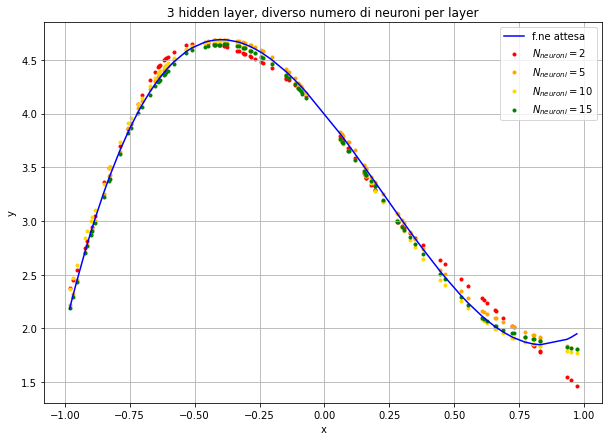

In [101]:
fig = plt.figure(figsize=(10,7))
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted.sort()
plt.scatter(x_predicted, model_3_2.predict(x_predicted),color='r', label = '$N_{neuroni}=2$', marker = '.')
plt.scatter(x_predicted, model_3_5.predict(x_predicted),color='orange', label = '$N_{neuroni}=5$', marker = '.')
plt.scatter(x_predicted, model_3_10.predict(x_predicted),color='gold', label = '$N_{neuroni}=10$', marker = '.')
plt.scatter(x_predicted, model_3_15.predict(x_predicted),color='green', label = '$N_{neuroni}=15$', marker = '.')
plt.plot(x_predicted, a+b*x_predicted+c*(x_predicted**2)+d*(x_predicted**3), color = 'blue', label='f.ne attesa')
plt.grid(True)
plt.legend()
plt.title("3 hidden layer, diverso numero di neuroni per layer")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 1) Confronto: numero di hidden layers $N_{hl}$  e numero di neuroni $N_{neuroni}$ per layer

$N_{hl}$ | $N_{neuroni}$ | $\sigma$ |# parametri| loss $E_{out}$
-----------|----------|------------|-----|----
1|2|0.2|13|0.06227366626262665
1|5|0.2|46|0.040893297642469406
1|10|0.2|141|0.041883185505867004
1|15|0.2|286|0.042087871581315994
2|2|0.2|19|0.04043779522180557
2|5|0.2|76|0.0407322496175766
2|10|0.2|251|0.041251812130212784
2|15|0.2|526|0.04036485031247139
3|2|0.2|25|0.05525469034910202
3|5|0.2|106|0.04084532707929611
3|10|0.2|361|0.04512860253453255
3|15|0.2|766|0.042211469262838364

Confrontando sia i vari grafici dei fit ottenuti, sia le loss dalla tabella, il modello che riesce a fittare meglio i nuovi dati è quello con **2 layer nascosti e 15 neuroni per layer**. D'ora in poi utilizzerò quindi questo modello al variare delle altre caratteristiche.

### 2) Funzione di attivazione
Utilizzo quindi il modello con 2 layers nascosti e 15 neuroni per layer e, tenendo sempre come ottimizzatore 'sgd' e loss 'mse', studio le performance al variare della funzione di attivazione provando 'selu','elu','relu' 'softplus','sigmoid'.

In [116]:
#selu
model_2_selu = tf.keras.Sequential()
model_2_selu.add(Dense(15, input_shape=(1,), activation='selu'))
model_2_selu.add(Dense(15, activation='selu'))
model_2_selu.add(Dense(15, activation='selu'))
model_2_selu.add(Dense(1, activation='selu'))

model_2_selu.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#relu
model_2_relu = tf.keras.Sequential()
model_2_relu.add(Dense(15, input_shape=(1,), activation='relu'))
model_2_relu.add(Dense(15, activation='relu'))
model_2_relu.add(Dense(15, activation='relu'))
model_2_relu.add(Dense(1, activation='elu'))

model_2_relu.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#elu
model_2_elu = tf.keras.Sequential()
model_2_elu.add(Dense(15, input_shape=(1,), activation='elu'))
model_2_elu.add(Dense(15, activation='elu'))
model_2_elu.add(Dense(15, activation='elu'))
model_2_elu.add(Dense(1, activation='elu'))

model_2_elu.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#sigmoide
model_2_sig = tf.keras.Sequential()
model_2_sig.add(Dense(15, input_shape=(1,), activation='sigmoid'))
model_2_sig.add(Dense(15, activation='sigmoid'))
model_2_sig.add(Dense(15, activation='sigmoid'))
model_2_sig.add(Dense(1, activation='sigmoid'))

model_2_sig.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#softplus
model_2_soft = tf.keras.Sequential()
model_2_soft.add(Dense(15, input_shape=(1,), activation='softplus'))
model_2_soft.add(Dense(15, activation='softplus'))
model_2_soft.add(Dense(15, activation='softplus'))
model_2_soft.add(Dense(1, activation='softplus'))

model_2_soft.compile(optimizer='sgd', loss='mse', metrics=['mse'])

n_epochs=50
history_2_selu = model_2_selu.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))
history_2_relu = model_2_relu.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history_2_elu = model_2_elu.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history_2_soft = model_2_soft.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history_2_sig = model_2_sig.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4355 - mse: 0.4355 - val_loss: 0.1389 - val_mse: 0.1389
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0890 - mse: 0.0890 - val_loss: 0.0663 - val_mse: 0.0663
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0515 - mse: 0.0515 - val_loss: 0.0479 - val_mse: 0.0479
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0493 - mse: 0.0493 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0479 - mse: 0.0479 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 8/50
200/200 [==============================] - 1s 5ms/step - loss: 0.

Epoch 13/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0407 - mse: 0.0407 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 14/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 15/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 16/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 17/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 18/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 19/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0403 - val_mse: 0.0403
Epoch 20/50
200/200 [==============================] - 0s 1ms/step - 

Epoch 36/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0836 - mse: 0.0836 - val_loss: 0.1579 - val_mse: 0.1579
Epoch 37/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0838 - mse: 0.0838 - val_loss: 0.0760 - val_mse: 0.0760
Epoch 38/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0767 - mse: 0.0767 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 39/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0756 - mse: 0.0756 - val_loss: 0.1068 - val_mse: 0.1068
Epoch 40/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0840 - mse: 0.0840 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 41/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0731 - mse: 0.0731 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 42/50
200/200 [==============================] - 0s 1ms/step - loss: 0.0713 - mse: 0.0713 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 43/50
200/200 [==============================] - 0s 1ms/step - 

In [117]:
# evaluate model
score_2_selu = model_2_selu.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_selu[0])
print('Test accuracy:', score_2_selu[1])

score_2_relu = model_2_relu.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_relu[0])
print('Test accuracy:', score_2_relu[1])

score_2_elu = model_2_elu.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_elu[0])
print('Test accuracy:', score_2_elu[1])

score_2_sig = model_2_sig.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_sig[0])
print('Test accuracy:', score_2_sig[1])

score_2_soft = model_2_soft.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_soft[0])
print('Test accuracy:', score_2_soft[1])

20/20 [==============================] - 0s 2ms/step - loss: 0.0408 - mse: 0.0408

Test loss: 0.040843188762664795
Test accuracy: 0.040843188762664795
20/20 [==============================] - 0s 3ms/step - loss: 0.0407 - mse: 0.0407

Test loss: 0.04066583141684532
Test accuracy: 0.04066583141684532
20/20 [==============================] - 0s 2ms/step - loss: 0.0437 - mse: 0.0437

Test loss: 0.04371117427945137
Test accuracy: 0.04371117427945137
20/20 [==============================] - 0s 3ms/step - loss: 6.8708 - mse: 6.8708

Test loss: 6.870795249938965
Test accuracy: 6.870795249938965
20/20 [==============================] - 0s 2ms/step - loss: 0.0619 - mse: 0.0619

Test loss: 0.06192268058657646
Test accuracy: 0.06192268058657646


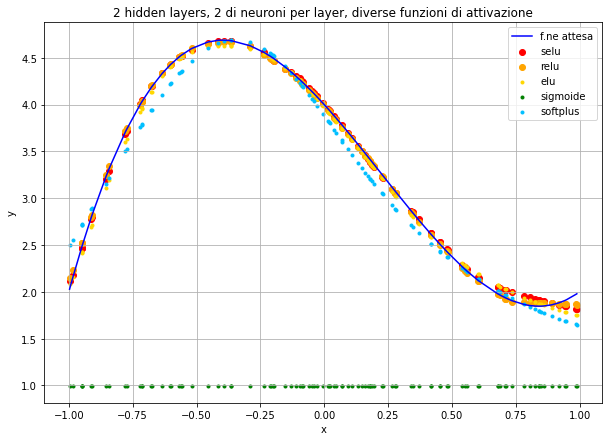

In [120]:
fig = plt.figure(figsize=(10,7))
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted.sort()
plt.scatter(x_predicted, model_2_selu.predict(x_predicted),color='r', label = 'selu')
plt.scatter(x_predicted, model_2_relu.predict(x_predicted),color='orange', label = 'relu')
plt.scatter(x_predicted, model_2_elu.predict(x_predicted),color='gold', label = 'elu', marker = '.')
plt.scatter(x_predicted, model_2_sig.predict(x_predicted),color='green', label = 'sigmoide', marker = '.')
plt.scatter(x_predicted, model_2_soft.predict(x_predicted),color='deepskyblue', label = 'softplus', marker = '.')
plt.plot(x_predicted, a+b*x_predicted+c*(x_predicted**2)+d*(x_predicted**3), color = 'blue', label='f.ne attesa')
plt.grid(True)
plt.legend()
plt.title("2 hidden layers, 15 di neuroni per layer, diverse funzioni di attivazione")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$N_{hl}$ | $N_{neuroni}$ | $\sigma$ |fne attivazione| loss $E_{out}$
-----------|----------|------------|-----|----
2|15|0.2|selu|0.040843188762664795
2|15|0.2|relu|0.04066583141684532
2|15|0.2|elu|0.04371117427945137
2|15|0.2|sigmoide|6.870795249938965
2|15|0.2|softplus|0.06192268058657646

Confrontando i modelli dal grafico e dalla tabella, si può osservare che quello che riesce a fittare meglio la funzione è il modello con la funzione di attivazione relu. Si osserve inoltre che la funzione sigmoide non può essere utilizzata in quanto ha il plateau.

### 3) Ottimizzatore.
Utilizzo quindi il modello con 2 layers nascosti e 15 neuroni per layer e funzione di attivazione 'relu', tenendo sempre come loss 'mse', e studio le performances al variare dell'ottimizzatore, provando 'SGD', 'Adagrad', 'Adadelta', 'Adam' e 'Nadam'.

In [122]:
#sgd
model_2_sgd = tf.keras.Sequential()
model_2_sgd.add(Dense(15, input_shape=(1,), activation='relu'))
model_2_sgd.add(Dense(15, activation='relu'))
model_2_sgd.add(Dense(15, activation='relu'))
model_2_sgd.add(Dense(1, activation='elu'))

model_2_sgd.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#Adagrad
model_2_adag = tf.keras.Sequential()
model_2_adag.add(Dense(15, input_shape=(1,), activation='relu'))
model_2_adag.add(Dense(15, activation='relu'))
model_2_adag.add(Dense(15, activation='relu'))
model_2_adag.add(Dense(1, activation='elu'))

model_2_adag.compile(optimizer='Adagrad', loss='mse', metrics=['mse'])

#Adadelta
model_2_adad = tf.keras.Sequential()
model_2_adad.add(Dense(15, input_shape=(1,), activation='relu'))
model_2_adad.add(Dense(15, activation='relu'))
model_2_adad.add(Dense(15, activation='relu'))
model_2_adad.add(Dense(1, activation='elu'))

model_2_adad.compile(optimizer='Adadelta', loss='mse', metrics=['mse'])

#Adam
model_2_adam = tf.keras.Sequential()
model_2_adam.add(Dense(15, input_shape=(1,), activation='relu'))
model_2_adam.add(Dense(15, activation='relu'))
model_2_adam.add(Dense(15, activation='relu'))
model_2_adam.add(Dense(1, activation='elu'))

model_2_adam.compile(optimizer='Adam', loss='mse', metrics=['mse'])

#Nadam
model_2_nadam = tf.keras.Sequential()
model_2_nadam.add(Dense(15, input_shape=(1,), activation='relu'))
model_2_nadam.add(Dense(15, activation='relu'))
model_2_nadam.add(Dense(15, activation='relu'))
model_2_nadam.add(Dense(1, activation='elu'))

model_2_nadam.compile(optimizer='Nadam', loss='mse', metrics=['mse'])

n_epochs=50
history_2_sgd = model_2_sgd.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))
history_2_adag = model_2_adag.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))
history_2_adad = model_2_adad.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))
history_2_adam = model_2_adam.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))
history_2_nadam = model_2_nadam.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/50
200/200 [==============================] - 2s 8ms/step - loss: 0.9524 - mse: 0.9524 - val_loss: 0.3201 - val_mse: 0.3201
Epoch 2/50
200/200 [==============================] - 1s 6ms/step - loss: 0.1951 - mse: 0.1951 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 0.0958 - mse: 0.0958 - val_loss: 0.0715 - val_mse: 0.0715
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0649 - mse: 0.0649 - val_loss: 0.0571 - val_mse: 0.0571
Epoch 5/50
200/200 [==============================] - 1s 6ms/step - loss: 0.0561 - mse: 0.0561 - val_loss: 0.0521 - val_mse: 0.0521
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0524 - mse: 0.0524 - val_loss: 0.0497 - val_mse: 0.0497
Epoch 7/50
200/200 [==============================] - 1s 6ms/step - loss: 0.0500 - mse: 0.0500 - val_loss: 0.0476 - val_mse: 0.0476
Epoch 8/50
200/200 [==============================] - 1s 5ms/step - loss: 0.

200/200 [==============================] - 1s 3ms/step - loss: 10.9209 - mse: 10.9209 - val_loss: 11.3145 - val_mse: 11.3145
Epoch 24/50
200/200 [==============================] - 1s 4ms/step - loss: 10.8176 - mse: 10.8176 - val_loss: 11.2033 - val_mse: 11.2033
Epoch 25/50
200/200 [==============================] - 1s 3ms/step - loss: 10.7069 - mse: 10.7069 - val_loss: 11.0842 - val_mse: 11.0842
Epoch 26/50
200/200 [==============================] - 1s 4ms/step - loss: 10.5882 - mse: 10.5882 - val_loss: 10.9560 - val_mse: 10.9560
Epoch 27/50
200/200 [==============================] - 1s 4ms/step - loss: 10.4607 - mse: 10.4607 - val_loss: 10.8185 - val_mse: 10.8185
Epoch 28/50
200/200 [==============================] - 0s 2ms/step - loss: 10.3239 - mse: 10.3239 - val_loss: 10.6705 - val_mse: 10.6705
Epoch 29/50
200/200 [==============================] - 1s 4ms/step - loss: 10.1767 - mse: 10.1767 - val_loss: 10.5112 - val_mse: 10.5112
Epoch 30/50
200/200 [==============================] 

Epoch 46/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 47/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0408 - mse: 0.0408 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 48/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0408 - mse: 0.0408 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 49/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0408 - mse: 0.0408 - val_loss: 0.0405 - val_mse: 0.0405
Epoch 50/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0409 - mse: 0.0409 - val_loss: 0.0401 - val_mse: 0.0401


In [123]:
# evaluate model
score_2_sgd = model_2_sgd.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_sgd[0])
print('Test accuracy:', score_2_sgd[1])

score_2_adag = model_2_adag.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_adag[0])
print('Test accuracy:', score_2_adag[1])

score_2_adad = model_2_adad.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Tesloss:', score_2_adad[0])
print('Test accuracy:', score_2_adad[1])

score_2_adam = model_2_adam.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_adam[0])
print('Test accuracy:', score_2_adam[1])

score_2_nadam = model_2_nadam.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_nadam[0])
print('Test accuracy:', score_2_nadam[1])

20/20 [==============================] - 0s 2ms/step - loss: 0.0406 - mse: 0.0406

Test loss: 0.040599215775728226
Test accuracy: 0.040599215775728226
20/20 [==============================] - 0s 2ms/step - loss: 1.0573 - mse: 1.0573

Test loss: 1.0572960376739502
Test accuracy: 1.0572960376739502
20/20 [==============================] - 0s 4ms/step - loss: 3.9796 - mse: 3.9796

Tesloss: 3.9796082973480225
Test accuracy: 3.9796080589294434
20/20 [==============================] - 0s 2ms/step - loss: 0.0405 - mse: 0.0405

Test loss: 0.04047686979174614
Test accuracy: 0.04047686979174614
20/20 [==============================] - 0s 2ms/step - loss: 0.0401 - mse: 0.0401

Test loss: 0.04008741304278374
Test accuracy: 0.04008741304278374


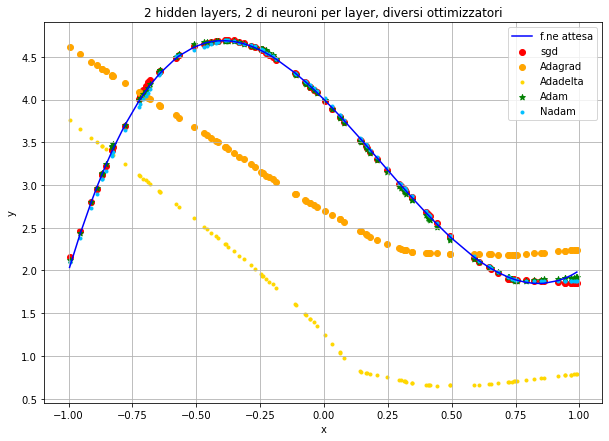

In [126]:
fig = plt.figure(figsize=(10,7))
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted.sort()
plt.scatter(x_predicted, model_2_sgd.predict(x_predicted),color='r', label = 'sgd')
plt.scatter(x_predicted, model_2_adag.predict(x_predicted),color='orange', label = 'Adagrad')
plt.scatter(x_predicted, model_2_adad.predict(x_predicted),color='gold', label = 'Adadelta', marker = '.')
plt.scatter(x_predicted, model_2_adam.predict(x_predicted),color='green', label = 'Adam', marker = '*')
plt.scatter(x_predicted, model_2_nadam.predict(x_predicted),color='deepskyblue', label = 'Nadam', marker = '.')
plt.plot(x_predicted, a+b*x_predicted+c*(x_predicted**2)+d*(x_predicted**3), color = 'blue', label='f.ne attesa')
plt.grid(True)
plt.legend()
plt.title("2 hidden layers, 15 neuroni per layer, diversi ottimizzatori")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$N_{hl}$ | $N_{neuroni}$ | $\sigma$ |fne attivazione| ottimizzatore|loss $E_{out}$
-----------|----------|------------|-----|----|--
2|15|0.2|relu|SGD|0.040599215775728226
2|15|0.2|relu|Adagrad|1.0572960376739502
2|15|0.2|relu|Adadelta|3.9796082973480225
2|15|0.2|relu|Adam|0.04047686979174614
2|15|0.2|relu|Nadam|0.04008741304278374

Osservando il grafico dei vari fits e le loss dalla tabella, si nota che gli ottimizzatori 'sgd', 'Adam' e 'Nadam' hanno buone performances e tra loro praticamente equivalenti. Il fit ottenuto con 'Nadam' è forse quello che riesce a seguire meglio l'andamento della funzione target.

### 4) Funzione di loss
Utilizzo quindi il modello con 2 layers nascosti e 15 neuroni per layer, funzione di attivazione 'relu', ottimizzatore 'Nadam' e studio le performances al variare della funzione di loss provando 'mse'= mean squared error, 'mae' = mean absolute error, 'msle' = mean squared logarithmic error, 'logcosh'.

In [3]:
#mse
model_2_mse = tf.keras.Sequential()
model_2_mse.add(Dense(15, input_shape=(1,), activation='relu'))
model_2_mse.add(Dense(15, activation='relu'))
model_2_mse.add(Dense(15, activation='relu'))
model_2_mse.add(Dense(1, activation='elu'))

model_2_mse.compile(optimizer='Nadam', loss='mse', metrics=['mse'])

#mae
model_2_mae = tf.keras.Sequential()
model_2_mae.add(Dense(15, input_shape=(1,), activation='relu'))
model_2_mae.add(Dense(15, activation='relu'))
model_2_mae.add(Dense(15, activation='relu'))
model_2_mae.add(Dense(1, activation='elu'))

model_2_mae.compile(optimizer='Nadam', loss='mae', metrics=['mse'])

#msle
model_2_msle = tf.keras.Sequential()
model_2_msle.add(Dense(15, input_shape=(1,), activation='relu'))
model_2_msle.add(Dense(15, activation='relu'))
model_2_msle.add(Dense(15, activation='relu'))
model_2_msle.add(Dense(1, activation='elu'))

model_2_msle.compile(optimizer='Nadam', loss='msle', metrics=['mse'])

#logcosh
model_2_log = tf.keras.Sequential()
model_2_log.add(Dense(15, input_shape=(1,), activation='relu'))
model_2_log.add(Dense(15, activation='relu'))
model_2_log.add(Dense(15, activation='relu'))
model_2_log.add(Dense(1, activation='elu'))

model_2_log.compile(optimizer='Nadam', loss='logcosh', metrics=['mse'])

n_epochs=50
history_2_mse = model_2_mse.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))
history_2_mae = model_2_mae.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))
history_2_msle = model_2_msle.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))
history_2_log = model_2_log.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=n_epochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/50
200/200 [==============================] - 1s 4ms/step - loss: 4.5595 - mse: 4.5595 - val_loss: 0.7924 - val_mse: 0.7924
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3904 - mse: 0.3904 - val_loss: 0.1855 - val_mse: 0.1855
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1188 - mse: 0.1188 - val_loss: 0.0779 - val_mse: 0.0779
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0480 - val_mse: 0.0480
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0435 - val_mse: 0.0435
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0417 - mse: 0.0417 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 8/50
200/200 [==============================] - 1s 4ms/step - loss: 0.

Epoch 13/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1623 - mse: 0.0417 - val_loss: 0.1583 - val_mse: 0.0413
Epoch 14/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1631 - mse: 0.0419 - val_loss: 0.1590 - val_mse: 0.0416
Epoch 15/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1622 - mse: 0.0416 - val_loss: 0.1589 - val_mse: 0.0413
Epoch 16/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1623 - mse: 0.0416 - val_loss: 0.1608 - val_mse: 0.0424
Epoch 17/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1627 - mse: 0.0418 - val_loss: 0.1580 - val_mse: 0.0408
Epoch 18/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1621 - mse: 0.0415 - val_loss: 0.1577 - val_mse: 0.0405
Epoch 19/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1622 - mse: 0.0416 - val_loss: 0.1583 - val_mse: 0.0409
Epoch 20/50
200/200 [==============================] - 0s 2ms/step - 

200/200 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0406 - val_loss: 0.0026 - val_mse: 0.0407
Epoch 25/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0409 - val_loss: 0.0026 - val_mse: 0.0409
Epoch 26/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0409 - val_loss: 0.0025 - val_mse: 0.0403
Epoch 27/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0407 - val_loss: 0.0026 - val_mse: 0.0405
Epoch 28/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0408 - val_loss: 0.0026 - val_mse: 0.0404
Epoch 29/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0407 - val_loss: 0.0027 - val_mse: 0.0427
Epoch 30/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0406 - val_loss: 0.0025 - val_mse: 0.0400
Epoch 31/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0026

Epoch 36/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0198 - mse: 0.0403 - val_loss: 0.0196 - val_mse: 0.0402
Epoch 37/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0199 - mse: 0.0405 - val_loss: 0.0202 - val_mse: 0.0413
Epoch 38/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0198 - mse: 0.0404 - val_loss: 0.0196 - val_mse: 0.0400
Epoch 39/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0199 - mse: 0.0406 - val_loss: 0.0199 - val_mse: 0.0406
Epoch 40/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0199 - mse: 0.0406 - val_loss: 0.0200 - val_mse: 0.0409
Epoch 41/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0199 - mse: 0.0406 - val_loss: 0.0202 - val_mse: 0.0413
Epoch 42/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0198 - mse: 0.0404 - val_loss: 0.0197 - val_mse: 0.0404
Epoch 43/50
200/200 [==============================] - 0s 2ms/step - 

In [4]:
# evaluate model
score_2_mse = model_2_mse.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_mse[0])
print('Test accuracy:', score_2_mse[1])

score_2_mae = model_2_mae.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_mae[0])
print('Test accuracy:', score_2_mae[1])

score_2_msle = model_2_msle.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Tesloss:', score_2_msle[0])
print('Test accuracy:', score_2_msle[1])

score_2_log = model_2_log.evaluate(x_valid, y_valid, batch_size=50, verbose=1)
# print performance
print()
print('Test loss:', score_2_log[0])
print('Test accuracy:', score_2_log[1])

20/20 [==============================] - 0s 2ms/step - loss: 0.0441 - mse: 0.0441

Test loss: 0.04410400241613388
Test accuracy: 0.04410400241613388
20/20 [==============================] - 0s 2ms/step - loss: 0.1612 - mse: 0.0416

Test loss: 0.16121628880500793
Test accuracy: 0.041626013815402985
20/20 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0400

Tesloss: 0.0025377932470291853
Test accuracy: 0.040012843906879425
20/20 [==============================] - 0s 3ms/step - loss: 0.0196 - mse: 0.0400

Test loss: 0.019563887268304825
Test accuracy: 0.03999785706400871


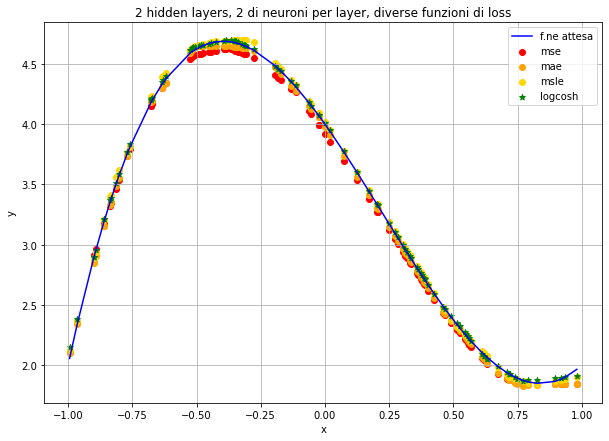

In [5]:
fig = plt.figure(figsize=(10,7))
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted.sort()
plt.scatter(x_predicted, model_2_mse.predict(x_predicted),color='r', label = 'mse')
plt.scatter(x_predicted, model_2_mae.predict(x_predicted),color='orange', label = 'mae')
plt.scatter(x_predicted, model_2_msle.predict(x_predicted),color='gold', label = 'msle')
plt.scatter(x_predicted, model_2_log.predict(x_predicted),color='green', label = 'logcosh', marker = '*')
plt.plot(x_predicted, a+b*x_predicted+c*(x_predicted**2)+d*(x_predicted**3), color = 'blue', label='f.ne attesa')
plt.grid(True)
plt.legend()
plt.title("2 hidden layers, 2 di neuroni per layer, diverse funzioni di loss")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$N_{hl}$ | $N_{neuroni}$ | $\sigma$ |fne attivazione| ottimizzatore| fne loss |loss $E_{out}$
-----------|----------|------------|-----|----|--|--
2|15|0.2|relu|Nadam|mse|0.04410400241613388
2|15|0.2|relu|Nadam|mae|0.16121628880500793
2|15|0.2|relu|Nadam|msle|0.0025377932470291853
2|15|0.2|relu|Nadam|logcosh|0.019563887268304825

Osservando il grafico dei vari fits e le loss dalla tabella, si nota che le funzioni di loss mse, 'msle' e logcosh hanno buone performances ma tra loro praticamente quella che permette di seguire meglio l'andamento della funzione target è 'msle'.


### 5) Test della migliore NN 
Ora controllo come i migliori modelli tra quelli provati fittino nuovi dati di test, sia nel range di training $x \in [-1,1]$ che al di fuori di esso.
### $x \in [-1,1]$

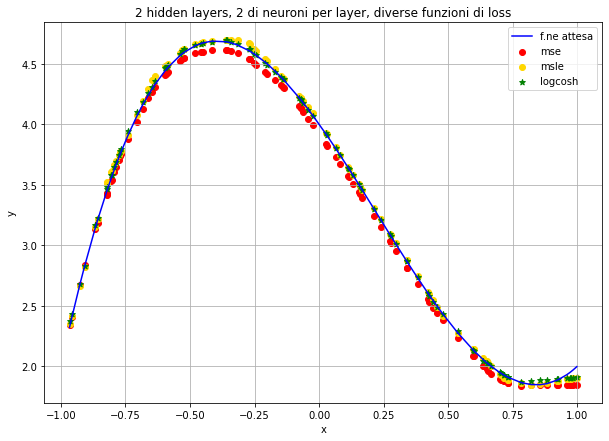

In [6]:
fig = plt.figure(figsize=(10,7))
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted.sort()
plt.scatter(x_predicted, model_2_mse.predict(x_predicted),color='r', label = 'mse')
plt.scatter(x_predicted, model_2_msle.predict(x_predicted),color='gold', label = 'msle')
plt.scatter(x_predicted, model_2_log.predict(x_predicted),color='green', label = 'logcosh', marker = '*')
plt.plot(x_predicted, a+b*x_predicted+c*(x_predicted**2)+d*(x_predicted**3), color = 'blue', label='f.ne attesa')
plt.grid(True)
plt.legend()
plt.title("2 hidden layers, 15 neuroni per layer, diverse funzioni di loss")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### x anche fuori dal range $[-1,1]$

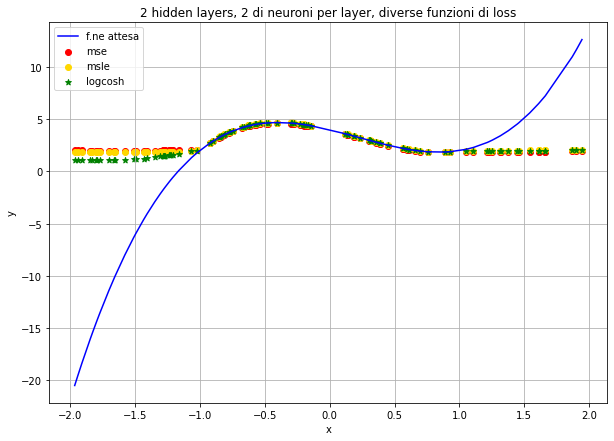

In [7]:
fig = plt.figure(figsize=(10,7))
x_predicted = np.random.uniform(-2, 2, 100)
x_predicted.sort()
plt.scatter(x_predicted, model_2_mse.predict(x_predicted),color='r', label = 'mse')
plt.scatter(x_predicted, model_2_msle.predict(x_predicted),color='gold', label = 'msle')
plt.scatter(x_predicted, model_2_log.predict(x_predicted),color='green', label = 'logcosh', marker = '*')
plt.plot(x_predicted, a+b*x_predicted+c*(x_predicted**2)+d*(x_predicted**3), color = 'blue', label='f.ne attesa')
plt.grid(True)
plt.legend()
plt.title("2 hidden layers, 2 di neuroni per layer, diverse funzioni di loss")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Come si osserva da entrambi i grafici, i 3 modelli considerati riescono a predirre bene l'andamento di nuovi dati generati nel range $x \in [-1,1]$ ovvero il range su cui sono stati trainati, mentre all'esterno di questo range producono risultati completamente errati. Tutti e 3 i modelli sono composti da 2 hidden layers con 15 neuroni per layer, per un totale di 525 parametri: tuttavia non sempre ad una maggiore complessità del modello (e quindi maggiore numero di parametri) corrispondono migliori risultati nel fit sui dati di training. Infatti i modelli considerati hanno performances praticamente equivalenti ad altri modelli con 2 hidden layers e numero di neuroni minore (vedi tabella confronto 1) ) e performance migliori dei modelli a 3 hidden layers con numero di parametri maggiore, come il modello con 3 hl e 15 neuroni per layer (766 parametri).